The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


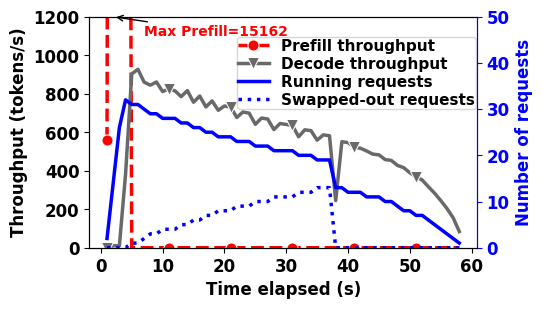

In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'font.weight': 'bold'})
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
densely_dashdotted = (0, (3, 1, 1, 1))

###### Plot for swap prefill+decode throughput 
filename = 'swap-60-percent-gpu'
data = pd.read_csv(f'{filename}.csv')

fig, ax1 = plt.subplots(figsize=(5, 3))
y1_tag = 'Avg prompt throughput (tokens/s)'
y2_tag = 'Avg generation throughput (tokens/s)'
min_y1_tag = 'Running (reqs)'
min_y2_tag = 'Swapped'
x_tag = 'Time elapsed (s)'
sns.lineplot(data=data, x=x_tag, y=y1_tag, marker='o', markevery=10, markersize=8,
             ax=ax1, color='red', linestyle='--', label='Prefill throughput')
sns.lineplot(data=data, x=x_tag, y=y2_tag, marker='v', markevery=10, markersize=8,
             ax=ax1, color='dimgray', label='Decode throughput')

ax1.set_ylabel('Throughput (tokens/s)', fontsize=12, fontweight='bold')
ax1.set_xlabel(x_tag, fontsize=12, fontweight='bold',)
ax1.set_ylim(0, 1200)
max_value = data[y1_tag].max()
max_value_index = data[y1_tag].idxmax()
ax1.annotate(f'Max Prefill={round(max_value)}', xy=(data[x_tag][max_value_index], 1200),
             xytext=(data[x_tag][max_value_index] + 5, 1100), color="red",
             arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=10)

# Create a second y-axis to plot the running requests
ax2 = ax1.twinx()

# Plot the Running (reqs) as a shaded area
ax2.plot(data[x_tag], data[min_y1_tag], color='blue', linestyle="-", label='Running requests')
ax2.plot(data[x_tag], data[min_y2_tag], color='blue', linestyle=":", label='Swapped-out requests')
ax2.set_ylabel('Number of requests', fontsize=12, fontweight='bold', color='blue')
ax2.set_ylim(0, 50)
ax2.tick_params(axis='y', color='blue', labelcolor='blue')
ax2.spines['right'].set_color('blue')

# Add legends to the plot
linewidth=2.5
lines1, labels1 = ax1.get_legend_handles_labels()
for line in lines1:
    line.set_linewidth(linewidth)
lines2, labels2 = ax2.get_legend_handles_labels()
for line in lines2:
    line.set_linewidth(linewidth)

ax1.legend(lines1 + lines2, labels1 + labels2, frameon=True, loc=(0.38,0.6),
           borderpad=0.1, labelspacing=0.2, columnspacing=0.5, fontsize=11)

plt.savefig(f"{filename}-comp-thru.eps", format='eps', bbox_inches='tight')
plt.savefig(f"{filename}-comp-thru.png", format='png', bbox_inches='tight')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


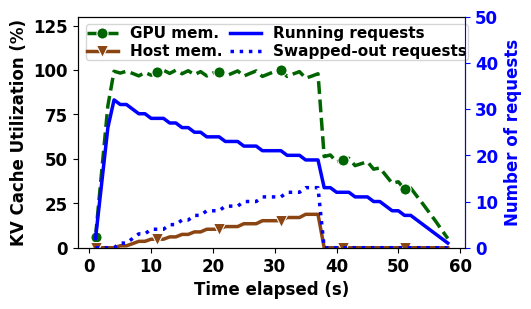

In [142]:
###### Plot for swap GPU + CPU utilization
filename = 'swap-60-percent-gpu'
data = pd.read_csv(f'{filename}.csv')

fig, ax1 = plt.subplots(figsize=(5, 3))
y1_tag = 'GPU KV cache usage (%)'
y2_tag = 'CPU KV cache usage (%)'
min_y1_tag = 'Running (reqs)'
min_y2_tag = 'Swapped'
x_tag = 'Time elapsed (s)'
sns.lineplot(data=data, x=x_tag, y=y1_tag, marker='o', markevery=10, markersize=8, 
             ax=ax1, color='darkgreen', linestyle='--', label='GPU mem.')

sns.lineplot(data=data, x=x_tag, y=y2_tag, marker='v', markevery=10, markersize=8,
             ax=ax1, color='saddlebrown', linestyle="solid", label='Host mem.')

ax1.set_ylabel('KV Cache Utilization (%)', fontsize=12, fontweight='bold')
ax1.set_xlabel(x_tag, fontsize=12, fontweight='bold',)
ax1.set_ylim(0, 130)
max_value = data[y1_tag].max()
max_value_index = data[y1_tag].idxmax()
ax1.annotate(f'Max prefill\n{round(max_value)}', xy=(data[x_tag][max_value_index], 1200),
             xytext=(data[x_tag][max_value_index] + 3.5, 1000), color="red",
             arrowprops=dict(facecolor='red', arrowstyle='->'))

# Create a second y-axis to plot the running requests
ax2 = ax1.twinx()

# Plot the Running (reqs) as a shaded area
ax2.plot(data[x_tag], data[min_y1_tag], color='blue', linestyle="-", label='Running requests')
ax2.plot(data[x_tag], data[min_y2_tag], color='blue', linestyle=":", label='Swapped-out requests')
ax2.set_ylabel('Number of requests', fontsize=12, fontweight='bold', color='blue')
ax2.set_ylim(0, 50)
ax2.tick_params(axis='y', color='blue', labelcolor='blue')
ax2.spines['right'].set_color('blue')


# Add legends to the plot
linewidth=2.5
lines1, labels1 = ax1.get_legend_handles_labels()
for line in lines1:
    line.set_linewidth(linewidth)
lines2, labels2 = ax2.get_legend_handles_labels()
for line in lines2:
    line.set_linewidth(linewidth)
# legend_lines1 = [plt.Line2D([], [], color=line.get_color(), lw=linewidth, linestyle=line.get_linestyle()) for line in lines1]

ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', ncol=2, borderpad=0.1, 
           labelspacing=0.2, columnspacing=0.5, frameon=True, fontsize=11)

plt.savefig(f"{filename}-kv-cache-util.eps", format='eps', bbox_inches='tight')
plt.savefig(f"{filename}-kv-cache-util.png", format='png', bbox_inches='tight')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


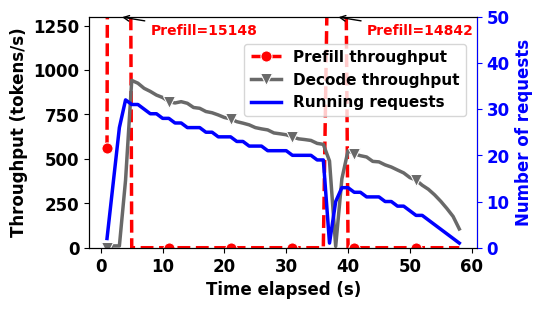

In [143]:
###### Plot for recompute prefill+decode throughput
filename = 'recompute-60-percent-gpu'
data = pd.read_csv(f'{filename}.csv')

fig, ax1 = plt.subplots(figsize=(5, 3))
y1_tag = 'Avg prompt throughput (tokens/s)'
y2_tag = 'Avg generation throughput (tokens/s)'
min_y1_tag = 'Running (reqs)'
x_tag = 'Time elapsed (s)'
sns.lineplot(data=data, x=x_tag, y=y1_tag, marker='o', markevery=10, markersize=8, 
             ax=ax1, color='red', linestyle='--', label='Prefill throughput')
sns.lineplot(data=data, x=x_tag, y=y2_tag, marker='v', markevery=10, markersize=8, 
             ax=ax1, color='dimgray', label='Decode throughput')

ax1.set_ylabel('Throughput (tokens/s)', fontsize=12, fontweight='bold')
ax1.set_xlabel(x_tag, fontsize=12, fontweight='bold',)
max_y = 1300
ax1.set_ylim(0, max_y)
max_value = data[y1_tag].max()
max_value_index = data[y1_tag].idxmax()
ax1.annotate(f'Prefill={round(max_value)}', xy=(data[x_tag][max_value_index], max_y),
             xytext=(data[x_tag][max_value_index] + 5, 1200), color="red",
             arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=10)

mid_index = len(data[y1_tag]) // 2
post_mid_data = data.iloc[mid_index:]
max_value_post_mid = post_mid_data[y1_tag].max()
max_value_index_post_mid = post_mid_data[y1_tag].idxmax()
ax1.annotate(f'Prefill={round(max_value_post_mid)}', xy=(data[x_tag][max_value_index_post_mid], max_y),
             xytext=(data[x_tag][max_value_index_post_mid] + 5, 1200), color="red",
             arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=10)

# Create a second y-axis to plot the running requests
ax2 = ax1.twinx()

# Plot the Running (reqs) as a shaded area
ax2.plot(data[x_tag], data[min_y1_tag], color='blue', linestyle="-", label='Running requests')
ax2.set_ylabel('Number of requests', fontsize=12, fontweight='bold', color='blue')
ax2.set_ylim(0, 50)
ax2.tick_params(axis='y', color='blue', labelcolor='blue')
ax2.spines['right'].set_color('blue')

# Add legends to the plot
linewidth=2.5
lines1, labels1 = ax1.get_legend_handles_labels()
for line in lines1:
    line.set_linewidth(linewidth)
lines2, labels2 = ax2.get_legend_handles_labels()
for line in lines2:
    line.set_linewidth(linewidth)

ax1.legend(lines1 + lines2, labels1 + labels2, loc=(0.4,0.57), frameon=True, fontsize=11)

plt.savefig(f"{filename}-comp-thru.eps", format='eps', bbox_inches='tight')
plt.savefig(f"{filename}-comp-thru.png", format='png', bbox_inches='tight')
plt.show()
